In [1]:
!pip install segmentation_models_pytorch
!pip install wandb

# Iniatial

In [ ]:
!mkdir Dataset
!mkdir Dataset/IMD2020

!wget -P Dataset/IMD2020 https://staff.utia.cas.cz/novozada/db/IMD2020.zip

--2024-04-25 07:25:43--  https://staff.utia.cas.cz/novozada/db/IMD2020.zip
Resolving staff.utia.cas.cz (staff.utia.cas.cz)... 147.231.16.197
Connecting to staff.utia.cas.cz (staff.utia.cas.cz)|147.231.16.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 592836398 (565M) [application/zip]
Saving to: ‘Dataset/IMD2020/IMD2020.zip’

IMD2020.zip         100%[===================>] 565.37M  7.27MB/s    in 83s     

2024-04-25 07:27:07 (6.79 MB/s) - ‘Dataset/IMD2020/IMD2020.zip’ saved [592836398/592836398]



In [ ]:
!unzip /content/Dataset/IMD2020/IMD2020.zip -d /content/Dataset/IMD2020

Archive:  /content/Dataset/IMD2020/IMD2020.zip
   creating: /content/Dataset/IMD2020/1a1ogs/
  inflating: /content/Dataset/IMD2020/1a1ogs/1a1ogs_orig.jpg  
  inflating: /content/Dataset/IMD2020/1a1ogs/c8tf5mq_0.png  
  inflating: /content/Dataset/IMD2020/1a1ogs/c8tf5mq_0_mask.png  
   creating: /content/Dataset/IMD2020/1a3oag/
  inflating: /content/Dataset/IMD2020/1a3oag/1a3oag_orig.jpg  
  inflating: /content/Dataset/IMD2020/1a3oag/c8tt7fg_0.jpg  
  inflating: /content/Dataset/IMD2020/1a3oag/c8tt7fg_0_mask.png  
  inflating: /content/Dataset/IMD2020/1a3oag/c8ttni9_0.jpg  
  inflating: /content/Dataset/IMD2020/1a3oag/c8ttni9_0_mask.png  
  inflating: /content/Dataset/IMD2020/1a3oag/c8ttxcu_0.jpg  
  inflating: /content/Dataset/IMD2020/1a3oag/c8ttxcu_0_mask.png  
  inflating: /content/Dataset/IMD2020/1a3oag/c8ttxi0_0.jpg  
  inflating: /content/Dataset/IMD2020/1a3oag/c8ttxi0_0_mask.png  
  inflating: /content/Dataset/IMD2020/1a3oag/c8tvsnn_0.jpg  
  inflating: /content/Dataset/IMD2020/1

In [ ]:
!rm -r /content/Dataset/IMD2020/IMD2020.zip

In [ ]:
# import shutil

# shutil.rmtree('/Project/Dataset', ignore_errors=True)

# Libraries

In [2]:
# For managing COCO dataset
# from pycocotools.coco import COCO

# For creating and managing folder/ files
import glob
import os
import shutil

# For managing images
from PIL import Image
import skimage.io as io

# Basic libraries
import numpy as np
import pandas as pd
import random
import cv2

# For plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import wandb

# For importing models and working with them
## Torch
import torch
import torch.utils.data # for Dataset
import torch.nn as nn
from torch.optim import Adam
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset
import segmentation_models_pytorch as smp

## Torchvision
import torchvision
from torchvision.transforms import transforms

# For creating train - test splits
from sklearn.model_selection import train_test_split

import pathlib
import pylab
import requests
from io import BytesIO
from pprint import pprint
from tqdm import tqdm
import time
from imutils import paths

# Performance Metrics
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix


# Functions - to have them separated in files
import CalcMetrics as cm
import BinaryMasks as bm
import TrainModel as train
import ValidateModel as val
import CreateDataset as crd
import DisplayMetrics as dm
import PlotResults as pr
import MainLoop as main


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


# %matplotlib inline

cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda


# Data

## Data Preparation

In [3]:
dataset_path = 'Dataset/IMD2020'
num_folders = 300  # Number of folders to read

original_images, altered_images, masks = crd.load_dataset(dataset_path, num_folders)


Starting loading dataset
Error loading images for folder 1d6mhe: [Errno 2] No such file or directory: 'Dataset/IMD2020/1d6mhe/1d6mhe_orig.jpg'


In [4]:
len(original_images)

299

In [5]:
len(altered_images)

299

## Main

wandb: Currently logged in as: bianca-apostolescu (bianca-team). Use `wandb login --relogin` to force relogin


[INFO] TEST_SPLIT = 0.2 ...
Splits, Datasets, and Dataloaders
[INFO] Total time taken to create the dataset and dataloader: 0.00s
trainSteps = 23, testSteps = 7, valSteps = 6


[INFO] Training the network for 10 epochs...


100%|██████████| 10/10 [01:53<00:00, 11.36s/it]
/content/MainLoop.py:271: RuntimeWarning: invalid value encountered in scalar divide
  iou = intersection.sum() / union.sum()


[INFO] Total time taken to train the model: 115.29s




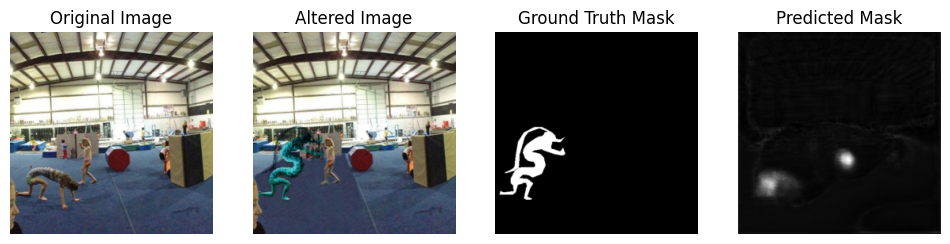

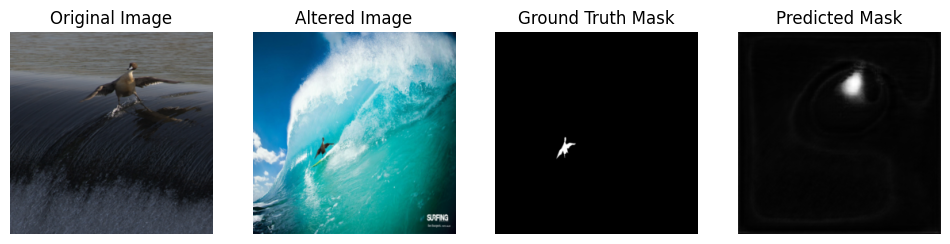

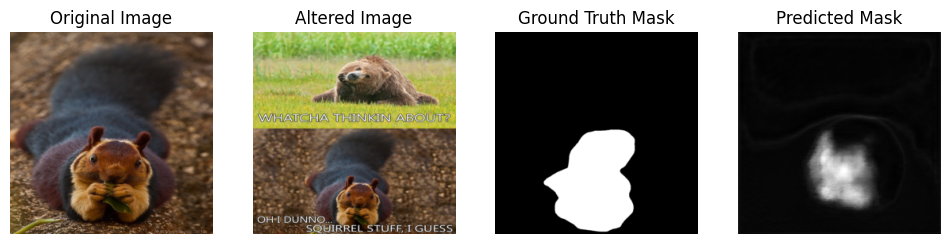

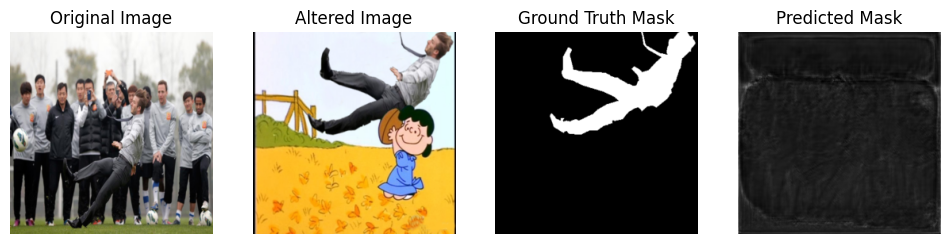

Accuracy,▁
DICE,▁
Epoch,▁▂▃▃▄▅▆▆▇█
F1-Score,▁
Precision,▁
Recall,▁
Train Loss,█▆▄▃▂▂▂▁▁▁
Valid Loss,█▅▄▂▂▂▁▁▁▁
Accuracy,1.0
DICE,0.5
Epoch,9


[INFO] Training the network for 20 epochs...


100%|██████████| 20/20 [03:45<00:00, 11.28s/it]
/content/MainLoop.py:271: RuntimeWarning: invalid value encountered in scalar divide
  iou = intersection.sum() / union.sum()


[INFO] Total time taken to train the model: 227.13s




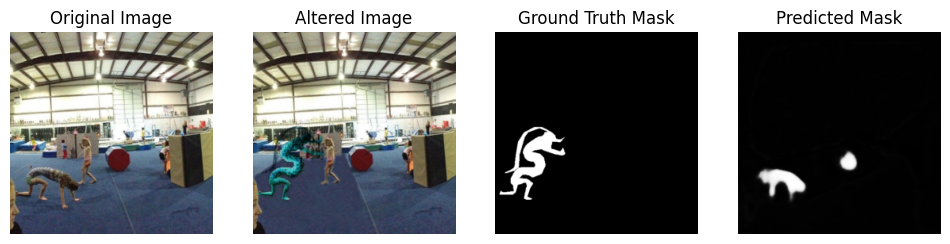

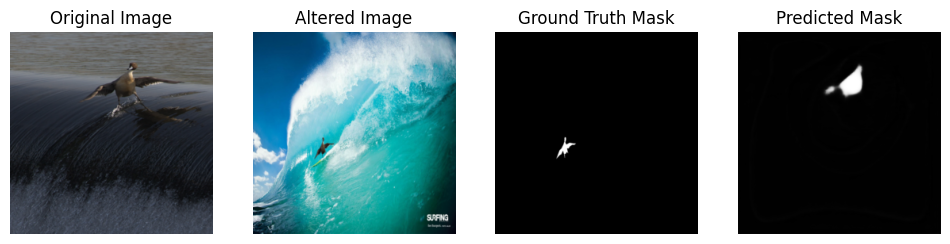

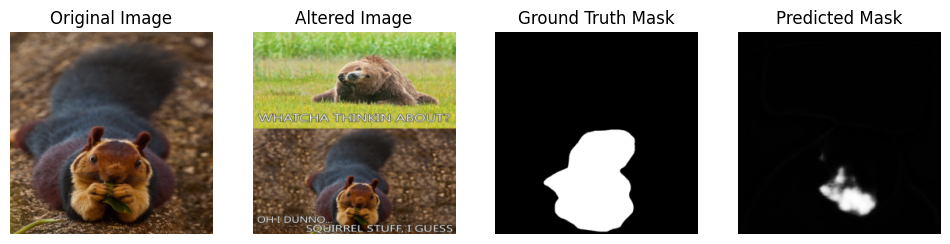

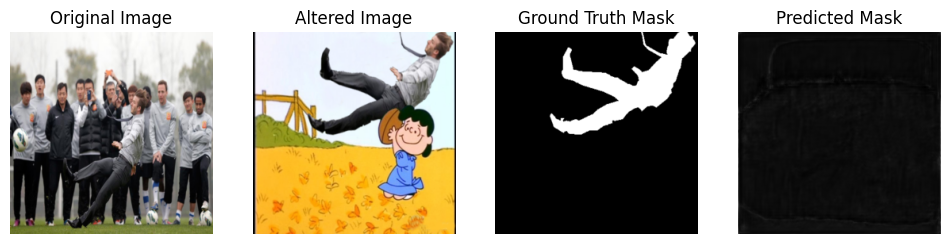

Accuracy,▁
DICE,▁
Epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
F1-Score,▁
Precision,▁
Recall,▁
Train Loss,█▇▇▆▅▅▄▄▃▃▃▂▂▂▂▂▁▁▁▁
Valid Loss,▇▇█▃▇▆▄▅▄▁▄▂▂▃▃▃▂▁▁▁
Accuracy,1.0
DICE,0.5
Epoch,19


[INFO] Training the network for 50 epochs...


100%|██████████| 50/50 [09:24<00:00, 11.29s/it]
/content/MainLoop.py:271: RuntimeWarning: invalid value encountered in scalar divide
  iou = intersection.sum() / union.sum()


[INFO] Total time taken to train the model: 567.09s




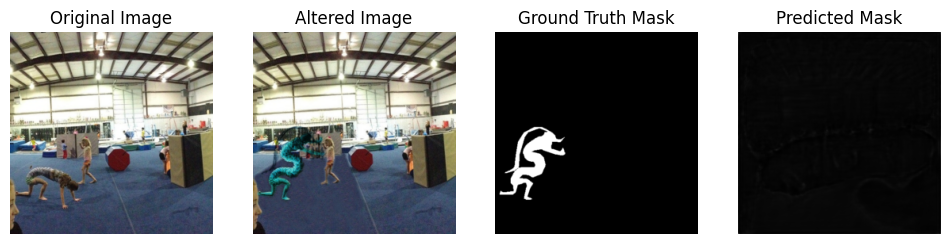

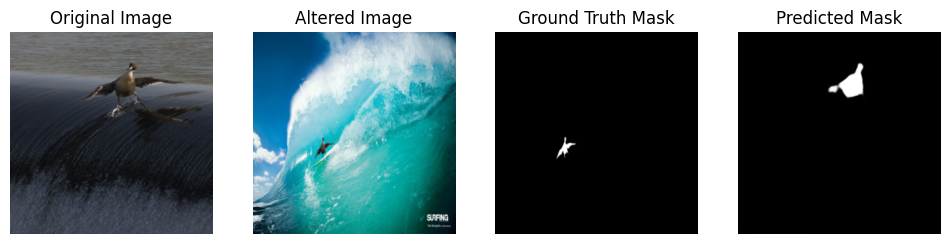

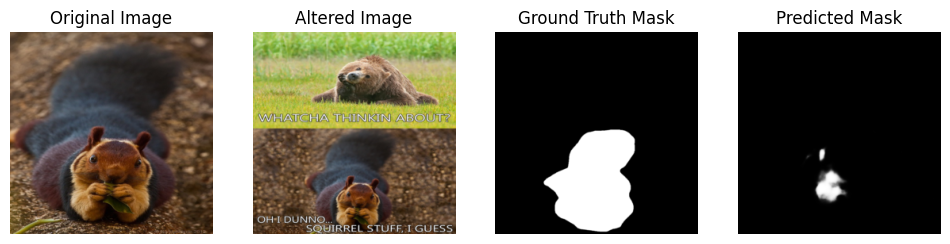

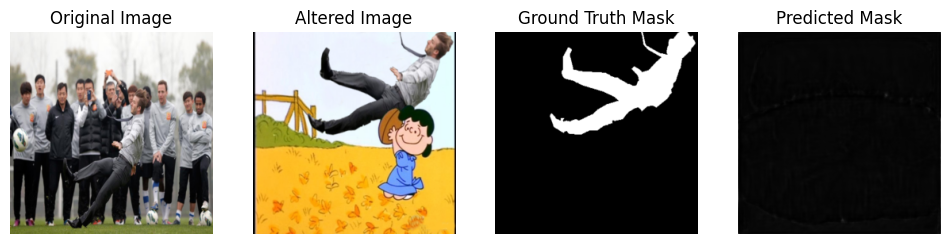

Accuracy,▁
DICE,▁
Epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
F1-Score,▁
Precision,▁
Recall,▁
Train Loss,▇██▇▆▇▇▆▆▆▇▅▄▃▃▃▃▃▃▂▂▂▂▃▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁
Valid Loss,▆█▆▇▄▇█▃▃▄▅▄▂▃▄▃▄▄▄▅▄▄▁▃▄▇▆▃▂▄▃▂▄▂▂▄▂▂▂▂
Accuracy,1.0
DICE,0.5
Epoch,49


[INFO] Training the network for 100 epochs...


  0%|          | 0/100 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [6]:
RESNET_SIZE = 256
transf_size = RESNET_SIZE

# Initialize transformations - train
transforms_train = transforms.Compose([
    transforms.Resize((transf_size, transf_size)),
    transforms.ToTensor(),
])

# Initialize transformations - test (optional)
transforms_test = transforms.Compose([
    transforms.Resize((transf_size, transf_size)),
    transforms.ToTensor(),
])

# Initialize the U-Net model
unet = smp.Unet(
                encoder_name = "resnet101",
                encoder_weights = "imagenet",
                in_channels = 3,  # 3 channels for the image
                classes = 1,  # 1 class => binary mask
                activation = 'sigmoid'
               ).to(device)


# Define hyperparameters
INIT_LR = 0.0001
BATCH_SIZE = 8
NUM_EPOCHS = [10, 20, 50, 100, 150]
TEST_SPLIT = [0.2] # 0.3
VALID_SPLIT = 0.2 # 0.1

wb_name = "resnet_implementation"

main.main_loop(unet, original_images, altered_images, masks, transforms_train, transforms_test, wb_name, INIT_LR, BATCH_SIZE, NUM_EPOCHS, TEST_SPLIT, VALID_SPLIT)





TypeError: plot_results() takes 1 positional argument but 5 were given